In [2]:
import numpy as np
from neural_net import NeuralNet
%load_ext autoreload
%autoreload 2
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
filename = "mnist"
nn = NeuralNet.fromMAT(filename, varname = 'tr', type="train", lam=10, M=300)
print np.shape(nn.T)
nn.train(stepSize=5e-5, maxFunctionCalls=5000, varname='tr')

(6, 1000)
Actual data
can only plot data if x is two dimensional
It took 4.60147857666e-05 seconds to plot original data.
using standard gradient descent


KeyboardInterrupt: 

In [ ]:
nn.test(varname='te')
nn.validate(varname='va')

In [19]:
M = np.linspace(25,300,(325-25)*1.0/25.0)
print M

trainCER = M * 1.0
testCER = M * 1.0
validateCER = M * 1.0

trainTime = M * 0.0

Trials = 3

for i in range(len(M)):
    for j in range(Trials):
        m = M[i]
        filename = "mnist"
        nn = NeuralNet.fromMAT(filename, varname = 'tr', type="train", lam=0, M=m)

        nn.train(stepSize=5e-5, maxFunctionCalls=5000, varname='tr', verbose=False)
        if (nn.missclassifiedRate < trainCER[i]):
            trainCER[i] = nn.missclassifiedRate
        
        trainTime[i] += nn.trainingTime

        nn.test(varname='te', verbose=False)
        if (nn.missclassifiedRate < testCER[i]):
            testCER[i] = nn.missclassifiedRate

        nn.validate(varname='va', verbose=False)
        if (nn.missclassifiedRate < validateCER[i]):
            validateCER[i] = nn.missclassifiedRate

[  25.   50.   75.  100.  125.  150.  175.  200.  225.  250.  275.  300.]
using standard gradient descent
It took 28.6825590134 seconds to train.
1000
self.correctlyClassified shape: (1000,)
number of entries missclassified = 248
missclassification rate  = 0.248
### TEST DATASET ###
500
self.correctlyClassified shape: (500,)
number of entries missclassified = 109
missclassification rate  = 0.218
It took 0.025367975235 seconds to test.
### VALIDATION DATASET ###
500
self.correctlyClassified shape: (500,)
number of entries missclassified = 107
missclassification rate  = 0.214
It took 0.0291628837585 seconds to validate.
using standard gradient descent
It took 35.2124919891 seconds to train.
1000
self.correctlyClassified shape: (1000,)
number of entries missclassified = 240
missclassification rate  = 0.24
### TEST DATASET ###
500
self.correctlyClassified shape: (500,)
number of entries missclassified = 95
missclassification rate  = 0.19
It took 0.0219368934631 seconds to test.
### VALIDAT

In [22]:
nn.missclassifiedRate
print trainCER

[ 0.24   0.135  0.104  0.086  0.069  0.058  0.057  0.047  0.045  0.043
  0.04   0.035]


Training CER vs. M (number of hidden nodes)
Test CER vs. M (number of hidden nodes)
Validation CER vs. M (number of hidden nodes)


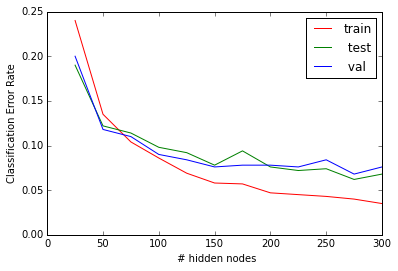

Training time vs. M (number of hidden nodes)


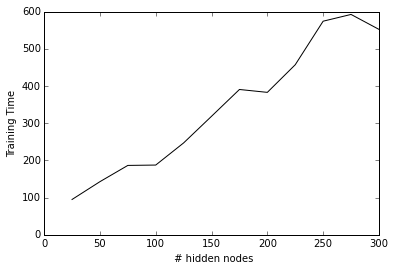

In [24]:
print "Training CER vs. M (number of hidden nodes)"    
plt.plot(M, trainCER, 'red', label = 'train')

print "Test CER vs. M (number of hidden nodes)"    
plt.plot(M, testCER, 'green', label=' test')

print "Validation CER vs. M (number of hidden nodes)"    
plt.plot(M, validateCER, 'blue', label=" val")

plt.xlabel(' # hidden nodes')
plt.ylabel('Classification Error Rate')
plt.legend(loc='best')
plt.show()


plt.show()

print "Training time vs. M (number of hidden nodes)"    
plt.xlabel(' # hidden nodes')
plt.ylabel('Training Time')
plt.plot(M, trainTime, 'black')
plt.show()

In [27]:
M = np.linspace(0,5,10)
print M

trainCER = M * 1.0
testCER = M * 1.0
validateCER = M * 1.0

trainTime = M * 0.0

Trials = 1

for i in range(len(M)):
    for j in range(Trials):
        m = M[i]
        filename = "mnist"
        nn = NeuralNet.fromMAT(filename, varname = 'tr', type="train", lam=m, M=150)

        nn.train(stepSize=5e-5, maxFunctionCalls=5000, varname='tr', verbose=False)
        if (nn.missclassifiedRate < trainCER[i]):
            trainCER[i] = nn.missclassifiedRate
        
        trainTime[i] += nn.trainingTime

        nn.test(varname='te', verbose=False)
        if (nn.missclassifiedRate < testCER[i]):
            testCER[i] = nn.missclassifiedRate

        nn.validate(varname='va', verbose=False)
        if (nn.missclassifiedRate < validateCER[i]):
            validateCER[i] = nn.missclassifiedRate

[ 0.          0.55555556  1.11111111  1.66666667  2.22222222  2.77777778
  3.33333333  3.88888889  4.44444444  5.        ]
using standard gradient descent
It took 103.453661203 seconds to train.
1000
self.correctlyClassified shape: (1000,)
number of entries missclassified = 53
missclassification rate  = 0.053
### TEST DATASET ###
500
self.correctlyClassified shape: (500,)
number of entries missclassified = 44
missclassification rate  = 0.088
It took 0.0271680355072 seconds to test.
### VALIDATION DATASET ###
500
self.correctlyClassified shape: (500,)
number of entries missclassified = 46
missclassification rate  = 0.092
It took 0.0264730453491 seconds to validate.
using standard gradient descent
It took 112.088439941 seconds to train.
1000
self.correctlyClassified shape: (1000,)
number of entries missclassified = 73
missclassification rate  = 0.073
### TEST DATASET ###
500
self.correctlyClassified shape: (500,)
number of entries missclassified = 46
missclassification rate  = 0.092
It t

Training CER vs. M (number of hidden nodes)
Test CER vs. M (number of hidden nodes)
Validation CER vs. M (number of hidden nodes)


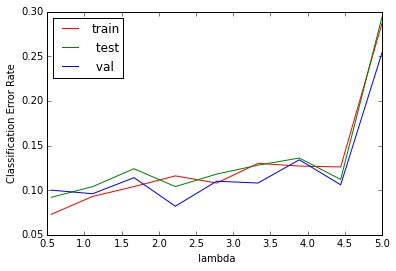

Training time vs. M (number of hidden nodes)


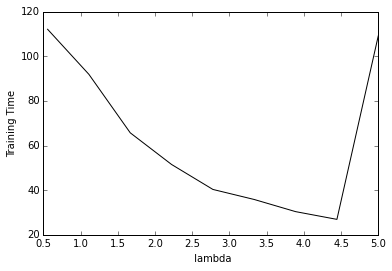

In [31]:
print "Training CER vs. M (number of hidden nodes)"    
plt.plot(M[1:], trainCER[1:], 'red', label = 'train')

print "Test CER vs. M (number of hidden nodes)"    
plt.plot(M[1:], testCER[1:], 'green', label=' test')

print "Validation CER vs. M (number of hidden nodes)"    
plt.plot(M[1:], validateCER[1:], 'blue', label=" val")

plt.xlabel(' lambda')
plt.ylabel('Classification Error Rate')
plt.legend(loc='best')
plt.show()


plt.show()

print "Training time vs. M (number of hidden nodes)"    
plt.xlabel(' lambda')
plt.ylabel('Training Time')
plt.plot(M[1:], trainTime[1:], 'black')
plt.show()